# Práctica de edición de tablas. Construcción de tabla de datos de COVID
En esta sección se construirá una tabla de datos para utilizar posteriormente en los análisis. Nos basaremos en la tabla de datos de COVID19 de la Secretaría de Salud de México

In [2]:
#

In [36]:
#Importar las librerías
import pandas as pd
import numpy as np

In [37]:
#Importar los datos
#Carga de datos
filename = 'C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque2  Limpieza de Datos y Análisis Descriptivo Univariado/210920COVID19MEXICO.csv'
data1 = pd.read_csv(filename, header=0,dtype={'FECHA_ACTUALIZACION':object,
                                              'ID_REGISTRO':object,
                                              'ORIGEN':np.int64,
                                              'SECTOR':np.int64,
                                              'ENTIDAD_UM':np.int64,
                                              'SEXO':np.int64,
                                              'ENTIDAD_NAC':np.int64,
                                              'ENTIDAD_RES':np.int64,
                                              'MUNICIPIO_RES':np.int64,
                                              'TIPO_PACIENTE':np.int64,
                                              'FECHA_INGRESO':object,
                                              'FECHA_SINTOMAS':object,
                                              'FECHA_DEF':object,
                                              'INTUBADO':np.int64,
                                              'NEUMONIA':np.int64,
                                              'EDAD':np.int64,
                                              'NACIONALIDAD':np.int64,
                                              'EMBARAZO':np.int64,
                                              'HABLA_LENGUA_INDIG':np.int64,
                                              'INDIGENA':np.int64,
                                              'DIABETES':np.int64,
                                              'EPOC':np.int64,
                                              'ASMA':np.int64,
                                              'INMUSUPR':np.int64,
                                              'HIPERTENSION':np.int64,
                                              'OTRA_COM':np.int64,
                                              'CARDIOVASCULAR':np.int64,
                                              'OBESIDAD':np.int64,
                                              'RENAL_CRONICA':np.int64,
                                              'TABAQUISMO':np.int64,
                                              'OTRO_CASO':np.int64,
                                              'TOMA_MUESTRA_LAB':np.int64,
                                              'RESULTADO_LAB':np.int64,
                                              'TOMA_MUESTRA_ANTIGENO':np.int64,
                                              'RESULTADO_ANTIGENO':np.int64,
                                              'CLASIFICACION_FINAL':np.int64,
                                              'MIGRANTE':np.int64,
                                              'PAIS_NACIONALIDAD':object,
                                              'PAIS_ORIGEN':object,
                                              'UCI':np.int64})


KeyboardInterrupt: 

In [ ]:
data1.dtypes

In [ ]:
#Filtrado para obtener solo los confirmados
data=data1.loc[data1.CLASIFICACION_FINAL.isin([1,2,3])]

In [ ]:
del data1  #Esto es para que no se sature la memoria

In [ ]:
#Vamos a encontrar las siguientes características (features):
#Vivo: indica si un individuo está vivo o muerto
#

features = pd.DataFrame({'Vivo':(data['FECHA_DEF']=='9999-99-99')*1,
                         'Muerto':(data['FECHA_DEF']!='9999-99-99')*1,
                         'SEXO':(data['SEXO']==2)*1, #La variable SEXO indica si es HOMBRE, porque son los de mayor riesgo
                         'EDAD':data['EDAD'],
                         'DIABETES':'   ',
                         'EPOC':'   ',
                         'ASMA':'   ',
                         'INMUSUPR':'   ',
                         'HIPERTENSION':'   ',
                         'CARDIOVASCULAR':'   ',
                         'OBESIDAD':'   ',
                         'RENAL_CRONICA':'   ',
                         'TABAQUISMO':'   ',
                         'UCI':'   ',
                         'HOSPITALIZADO':'   ',
                         'CONDICION':'                                                                              ',
                         'numComorb':0})



In [ ]:
features['Muerto'].value_counts()  #Esta cifra coincide con la de la red cuando se descarga la base en la mañana

In [ ]:
#Identificaremos las comorbilidades con una cadena y se crea una variable sola para Hospitalizado y UCI
features=features.copy()
cols = ['DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','TABAQUISMO']

for columna in cols:
#    features[columna][data[columna]==1]=columna[0:3]
    features.assign(columna=lambda x: (x.data[columna]==1)*columna[0:3])

In [10]:
#Conteo del número de comorbilidades en el paciente
#numComorb - Variable que indica el número de comorbilidades que tiene el paciente
for columna in cols:
    features['numComorb']= features['numComorb'] + (data[columna]==1)*1

<AxesSubplot:>

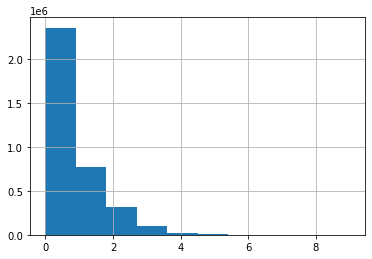

In [11]:
features.numComorb.hist()

In [12]:
def my_recode(val):
    if val == 2:
        return 1
    else:
        return 0

features['HOSPITALIZADO']=data['TIPO_PACIENTE'].apply(my_recode)
features['UCI']=(data['UCI']==1)*1
features['INTUBADO']=(data['INTUBADO']==1)*1

In [13]:
features['COMORBILIDADES']=features['DIABETES']+features['EPOC']+features['ASMA']+features['INMUSUPR']+features['HIPERTENSION']+features['CARDIOVASCULAR']+features['OBESIDAD']+features['RENAL_CRONICA']+features['TABAQUISMO']

#features.CONDICION.str.strip()
COMORBILIDADES=features.COMORBILIDADES
#CONDICION.replace("   ","")
#Reemplazamos los espacios por espacio vacío, usando la función map
#Note que esta función toma x que es cada elemento de la lista y con ello define la funcion a utilzar
#enc cada elemento de la lista
features.COMORBILIDADES=COMORBILIDADES.map(lambda x: x.replace("   ",""))

In [14]:
features

,Vivo,Muerto,SEXO,EDAD,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,HOSPITALIZADO,CONDICION,numComorb,INTUBADO,COMORBILIDADES
0,1,0,1,41,,,,,,,,,,0,0,...,0,0,
1,0,1,0,66,DIA,,,,HIP,,OBE,,,1,1,...,3,1,DIAHIPOBE
8,1,0,1,47,DIA,,,,,,,,,0,0,...,1,0,DIA
14,1,0,1,54,,,,,,,,,,0,0,...,0,0,
15,1,0,0,26,,,,,,,,,,0,0,...,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10368337,1,0,0,52,,,,,,,,,,0,0,...,0,0,
10368339,1,0,0,44,,,,,,,,,,0,0,...,0,0,
10368343,1,0,1,38,,,,,,,,,,0,0,...,0,0,
10368346,1,0,0,47,DIA,,,,,,,,,0,0,...,1,0,DIA


In [15]:
features.COMORBILIDADES.value_counts().head(10)

             2360333
OBE           226011
HIP           191012
TAB           147947
DIA           129675
DIAHIP        119312
HIPOBE         59284
DIAHIPOBE      42503
ASM            40715
OBETAB         32462
Name: COMORBILIDADES, dtype: int64

In [16]:
tabla_cruzada=pd.crosstab(features.COMORBILIDADES, features.Muerto)

In [17]:
tabla_cruzada

Muerto,0,1
COMORBILIDADES,,
,2275307,85026
ASM,39757,958
ASMCAR,290,16
ASMCAROBE,75,12
ASMCAROBEREN,2,1
...,...,...
OBERENTAB,142,26
OBETAB,30656,1806
REN,5724,1481


In [18]:
tabla_cruzada['Prob_Muerto']=tabla_cruzada[1]/tabla_cruzada[0]

In [19]:
tabla_cruzada.loc[tabla_cruzada['Prob_Muerto']>1.5]

Muerto,0,1,Prob_Muerto
COMORBILIDADES,,,
ASMHIPOBERENTAB,0,1,inf
ASMHIPRENTAB,2,8,4.000000
ASMINMCARRENTAB,0,1,inf
ASMINMRENTAB,0,1,inf
DIAASMCARREN,0,1,inf
DIAASMINMCAROBETAB,1,2,2.000000
DIAASMINMHIPCAROBEREN,0,1,inf
DIAASMINMHIPCAROBETAB,0,1,inf
DIAASMINMHIPCARTAB,0,1,inf


In [20]:
#Construcción de la variable de categorías de Edad
clases = [0,18, 30, 40, 50, 60, 100]
features['catEdad'] = pd.cut(features['EDAD'], clases)
features['catEdad']

0            (40.0, 50.0]
1           (60.0, 100.0]
8            (40.0, 50.0]
14           (50.0, 60.0]
15           (18.0, 30.0]
                ...      
10368337     (50.0, 60.0]
10368339     (40.0, 50.0]
10368343     (30.0, 40.0]
10368346     (40.0, 50.0]
10368350              NaN
Name: catEdad, Length: 3573044, dtype: category
Categories (6, interval[int64]): [(0, 18] < (18, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]

In [21]:
#De aquí conservamos las variables que nos interesan:
features2=features[['Muerto','EDAD','catEdad','SEXO','COMORBILIDADES','numComorb','HOSPITALIZADO','UCI','INTUBADO']]

In [22]:
features2

,Muerto,EDAD,catEdad,SEXO,COMORBILIDADES,numComorb,HOSPITALIZADO,UCI,INTUBADO
0,0,41,"(40.0, 50.0]",1,,0,0,0,0
1,1,66,"(60.0, 100.0]",0,DIAHIPOBE,3,1,1,1
8,0,47,"(40.0, 50.0]",1,DIA,1,0,0,0
14,0,54,"(50.0, 60.0]",1,,0,0,0,0
15,0,26,"(18.0, 30.0]",0,,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10368337,0,52,"(50.0, 60.0]",0,,0,0,0,0
10368339,0,44,"(40.0, 50.0]",0,,0,0,0,0
10368343,0,38,"(30.0, 40.0]",1,,0,0,0,0
10368346,0,47,"(40.0, 50.0]",0,DIA,1,0,0,0


In [23]:
del features

In [24]:
#Ahora extraemos información de fechas. El ingreso, el número de ´dias que tuvieron síntomas sin ir al hospital
#y, en su caso, el número de días que duraron en el hospital antes de morir

In [25]:
data=data.replace('9999-99-99','')

In [26]:
data['FECHA_DEF']=pd.to_datetime(data['FECHA_DEF'])
data['FECHA_INGRESO']=pd.to_datetime(data['FECHA_INGRESO'])
data['FECHA_SINTOMAS']=pd.to_datetime(data['FECHA_SINTOMAS'])

In [27]:
#Para obtener la diferencia en días numérica, se divide entre / pd.Timedelta(1, unit='d')
#Basado en: https://stackoverflow.com/questions/28172458/convert-days-difference-to-numeric-values-in-python-pandas
features2 = features2.copy()
features2['dias_sintomas_ingreso']=(data.FECHA_INGRESO-data.FECHA_SINTOMAS)/ pd.Timedelta(1, unit='d')
#features2['dias_sintomas_muerte']=(data.FECHA_DEF-data.FECHA_SINTOMAS)/ pd.Timedelta(1, unit='d')
features2['dias_ingreso_muerte']=(data.FECHA_DEF-data.FECHA_INGRESO)/ pd.Timedelta(1, unit='d')

In [28]:
features2['FECHA_INGRESO']=data['FECHA_INGRESO']

In [29]:
del data

In [30]:
features2.head()

,Muerto,EDAD,catEdad,SEXO,COMORBILIDADES,numComorb,HOSPITALIZADO,UCI,INTUBADO,dias_sintomas_ingreso,dias_ingreso_muerte,FECHA_INGRESO
0,0,41,"(40, 50]",1,,0,0,0,0,0.0,NaN,2020-10-16
1,1,66,"(60, 100]",0,DIAHIPOBE,3,1,1,1,3.0,1.0,2020-07-20
8,0,47,"(40, 50]",1,DIA,1,0,0,0,2.0,NaN,2020-08-19
14,0,54,"(50, 60]",1,,0,0,0,0,5.0,NaN,2020-08-31
15,0,26,"(18, 30]",0,,0,0,0,0,5.0,NaN,2020-09-08


In [31]:
#Guardamos la tabla de datos como DFCovidPositivos
#Esta tabla tiene las características de los pacientes que salieron positivos

In [32]:
features2.to_csv('dfCovidPositivos.csv', header=True, index=False)